<a href="https://colab.research.google.com/github/Priyanshiag1/Whatsapp-Chat-Analysis/blob/main/Dog_v_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:06<00:00, 183MB/s]
100% 1.06G/1.06G [00:06<00:00, 180MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
train_ds= keras.utils.image_dataset_from_directory(directory='/content/train',
                                         labels='inferred',
                                         label_mode='int',batch_size= 32,image_size=(256,256))
validation_ds= keras.utils.image_dataset_from_directory(directory='/content/test',
                                         labels='inferred',
                                         label_mode='int',batch_size= 32,image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label
train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)


In [11]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [14]:
history= model.fit(train_ds,epochs= 10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 102ms/step - loss: 1.4066 - accuracy: 0.5681 - val_loss: 0.6830 - val_accuracy: 0.6266
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6138 - accuracy: 0.6649 - val_loss: 0.5732 - val_accuracy: 0.6968
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5310 - accuracy: 0.7340 - val_loss: 0.4803 - val_accuracy: 0.7714
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4716 - accuracy: 0.7735 - val_loss: 0.5112 - val_accuracy: 0.7382
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4097 - accuracy: 0.8091 - val_loss: 0.4824 - val_accuracy: 0.7616
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3574 - accuracy: 0.8341 - val_loss: 0.4852 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2982 - accuracy: 0.8666 - val_loss: 0.4496 - val_ac

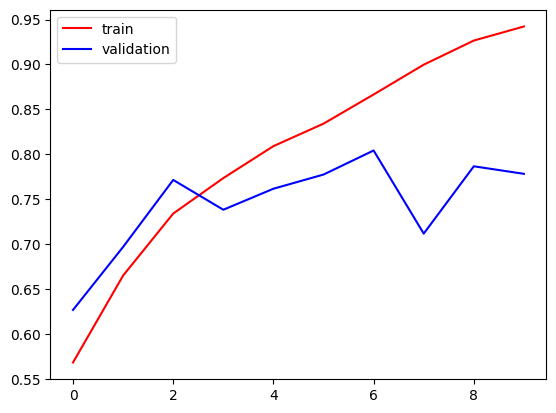

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


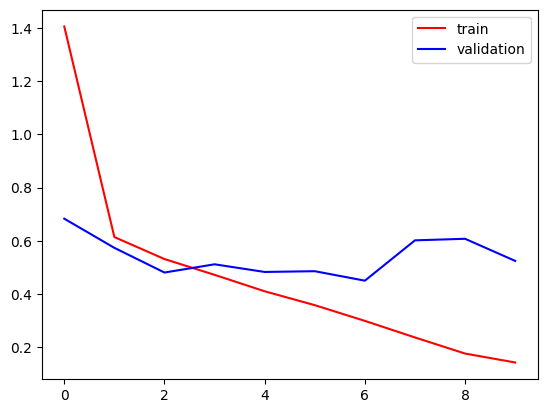

In [16]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [24]:
import cv2

In [27]:
test_img= cv2.imread('/content/cat.jpeg')

In [28]:
test_img.shape

(306, 459, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))


1/1 [==============================] - 0s 393ms/step
It is a cat


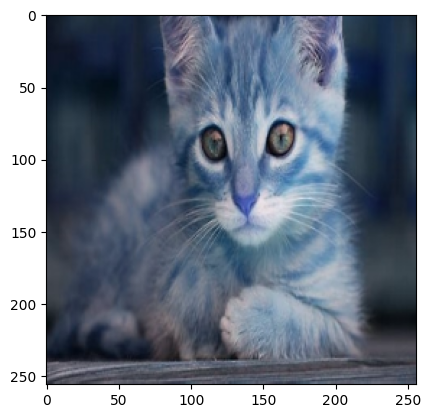

In [30]:
import numpy as np
predictions = model.predict(test_input)
predicted_class = np.argmax(predictions, axis=-1)  # For single-sample prediction
# predicted_class = np.argmax(predictions)  # Use this if predictions is a 1D array for a single sample

# Define your class labels
class_labels = ['cat', 'dog']

# Map the predicted class index to a label
if predicted_class == 0:
    print("It is a cat")
elif predicted_class == 1:
    print("It is a dog")
else:
    print("Unknown class")
plt.imshow(test_img)